# Emoji Prediction using Machine Learning

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [68]:
print("Sample Raw : ", df['Tweet'][2])

Sample Raw :  Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News


## Pre-processing

### Cleaning

In [69]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [74]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Cleaned : ",cleaned)

Cleaned :  democracy plaza in the wake of a stunning outcome decision  nbc news


In [75]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


### Pre-processing

In [71]:
import nltk
import spacy
from nltk.stem import WordNetLemmatizer

nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

In [72]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Sample    : ",cleaned)
print("Processed : ",tweet_preprocessing(cleaned))

Sample    :  democracy plaza in the wake of a stunning outcome decision  nbc news
Processed :  democracy plaza wake stunning outcome decision   nbc news


In [59]:
df["Tweet"] = df["Tweet"].apply(tweet_preprocessing)
df.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
...,...,...
49995,ootd love chain new ring putaringonit odesigne...,1
49996,met santa olaf north pole today north pole...,0
49997,new york night strideby herelocationnyc seemyc...,11
49998,kiss birthday girl helzberg diamond,0


## Tweets to CountVector Matrix

In [80]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer()

X = c_vect.fit_transform(df["Tweet"])
c_vect.get_feature_names()[100:110]

['absence',
 'absentee',
 'absinthe',
 'absolut',
 'absolute',
 'absolutely',
 'absolutelybesutifulflower',
 'absolutelythem',
 'absolutly',
 'abstract']

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["Tweet"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names()

count_vec

,amp,away,beating,best,birthday,cause,congrats,couscous,cousinlove,decision,...,veggie,vilo,wake,wall,walt,water,west,wisconsin,yesterday,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

y = df["Label"].values
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [84]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (42487, 54353)
Training y Dim  (42487,)


#   

## Multinomial Naive Bayes

In [85]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [101]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


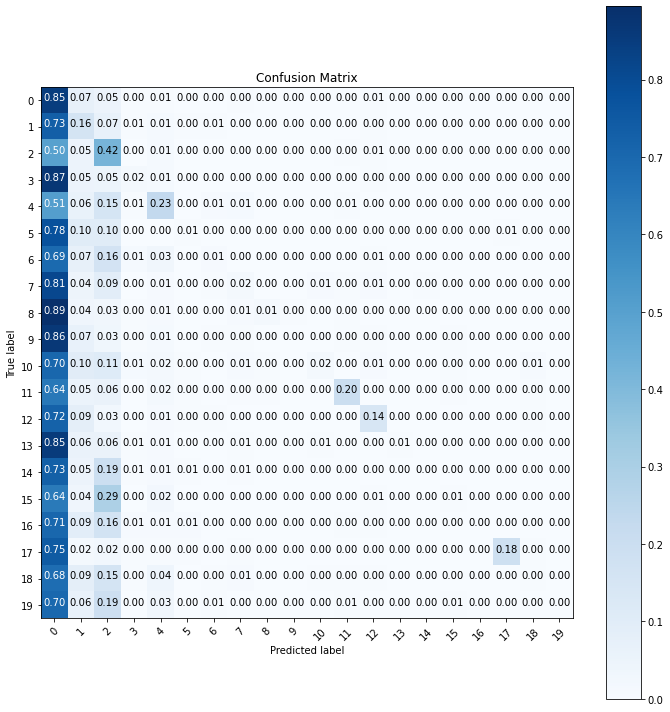

In [102]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [103]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.85      0.39      1632
           1       0.22      0.16      0.18       776
           2       0.36      0.42      0.39       791
           3       0.22      0.02      0.03       465
           4       0.49      0.23      0.32       351
           5       0.12      0.01      0.01       364
           6       0.15      0.01      0.02       301
           7       0.17      0.02      0.03       273
           8       0.40      0.01      0.03       275
           9       0.00      0.00      0.00       244
          10       0.50      0.02      0.04       239
          11       0.69      0.20      0.31       208
          12       0.49      0.14      0.22       220
          13       0.50      0.01      0.01       192
          14       0.00      0.00      0.00       196
          15       0.17      0.01      0.01       168
          16       0.00      0.00      0.00       207
          17       0.79    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#     

## Support Vector Machines

In [104]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)

SVC()

Normalized confusion matrix


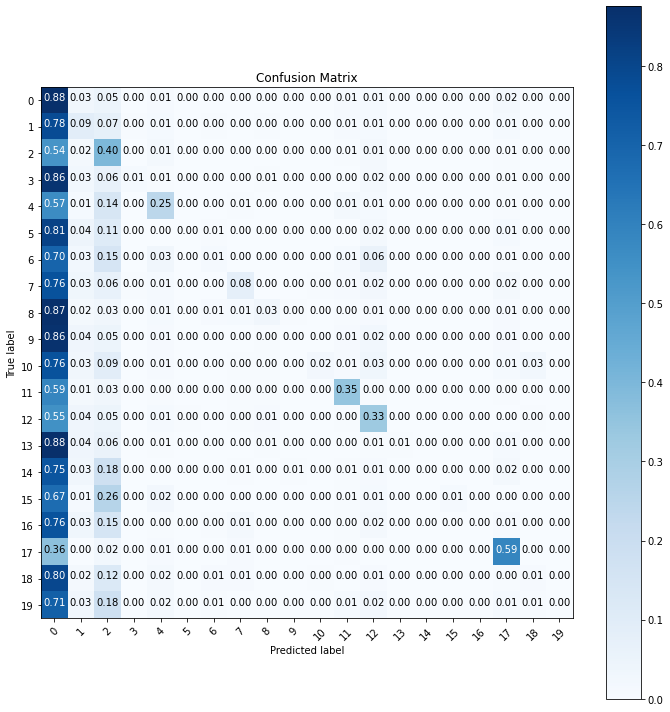

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [107]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.25      0.88      0.39      1632
           1       0.29      0.09      0.14       776
           2       0.36      0.40      0.38       791
           3       0.50      0.01      0.02       465
           4       0.54      0.25      0.34       351
           5       0.00      0.00      0.00       364
           6       0.24      0.01      0.03       301
           7       0.45      0.08      0.13       273
           8       0.40      0.03      0.05       275
           9       0.00      0.00      0.00       244
          10       0.50      0.02      0.04       239
          11       0.60      0.35      0.44       208
          12       0.38      0.33      0.35       220
          13       0.50      0.01      0.01       192
          14       0.00      0.00      0.00       196
          15       0.67      0.01      0.02       168
          16       0.00      0.00      0.00       207
          17       0.62    

C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\heman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#    

## Over-Sampling Data

In [111]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

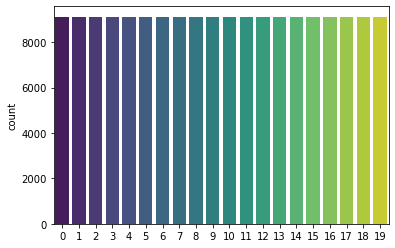

In [112]:
sns.countplot(x=y_train_osm, palette="viridis")
plt.show()

## Multinomial Naive Bayes

In [114]:
from sklearn.naive_bayes import MultinomialNB


NB_classifier = MultinomialNB()
NB_classifier.fit(X_train_osm, y_train_osm)

MultinomialNB()

Normalized confusion matrix


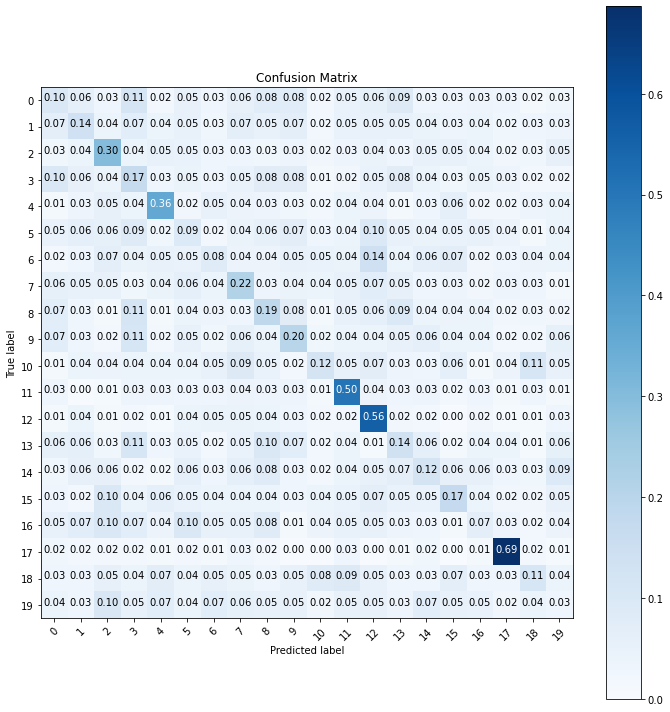

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [116]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.39      0.10      0.16      1632
           1       0.26      0.14      0.18       776
           2       0.46      0.30      0.36       791
           3       0.14      0.17      0.15       465
           4       0.35      0.36      0.36       351
           5       0.09      0.09      0.09       364
           6       0.10      0.08      0.09       301
           7       0.14      0.22      0.17       273
           8       0.11      0.19      0.14       275
           9       0.11      0.20      0.14       244
          10       0.14      0.12      0.13       239
          11       0.25      0.50      0.34       208
          12       0.23      0.56      0.33       220
          13       0.06      0.14      0.09       192
          14       0.08      0.12      0.09       196
          15       0.09      0.17      0.12       168
          16       0.05      0.07      0.06       207
          17       0.41    

## Support Vector Machines

In [117]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_osm, y_train_osm)

SVC()

Normalized confusion matrix


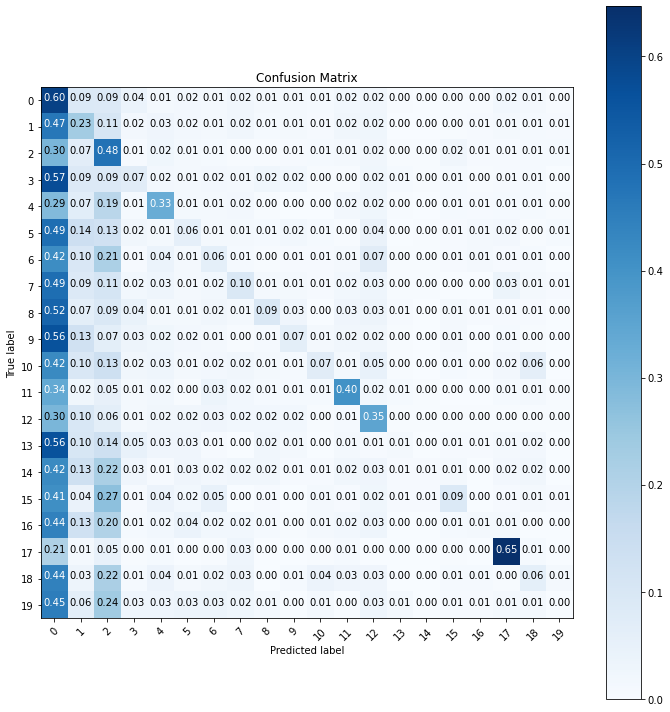

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plot_confusion_matrix(cm, [i for i in range(20)] ,title='Confusion Matrix', normalize=True)

In [121]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.28      0.60      0.38      1632
           1       0.24      0.23      0.24       776
           2       0.32      0.48      0.38       791
           3       0.18      0.07      0.10       465
           4       0.43      0.33      0.37       351
           5       0.16      0.06      0.09       364
           6       0.14      0.06      0.08       301
           7       0.18      0.10      0.13       273
           8       0.27      0.09      0.14       275
           9       0.17      0.07      0.09       244
          10       0.23      0.07      0.11       239
          11       0.43      0.40      0.42       208
          12       0.29      0.35      0.32       220
          13       0.07      0.01      0.02       192
          14       0.07      0.01      0.01       196
          15       0.22      0.09      0.13       168
          16       0.08      0.01      0.02       207
          17       0.59    